In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('raw_data.csv', index_col=0)

In [19]:
def get_experiment_df(exp: str, role = 'all'):
    new_df = df[df['experiment'] == exp]
    if role == 'all':
        return new_df
    return new_df[new_df['human_role'] == role]

def remove_un_imp_columns(df):
    questions_rename = {'How much did you enjoy the task?' : 'Q_enjoy',
                        "How successful do you think you were at completing the task?" : 'Q_successful'
                       }
    
    remove_cols = ['human_role', 'experiment', 'map', 'pid']
    all_cols = list(df.columns)
    remove_cols.extend(list(filter(lambda x: 'bot_' in x, all_cols)))
    df = df.drop(remove_cols, axis=1)
    
    df = df.rename(columns=questions_rename, errors="raise")
    return df


In [41]:
def plot_corr_matt(df, title):
    f = plt.figure(figsize=(15, 15))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title(f'{title} - Correlation Matrix', fontsize=16)

    
def plot_2d(df, title, x, y, color, size):
    fig = px.scatter(df, x=x, y=y, color=color, size=size, title=title)
    fig.show()

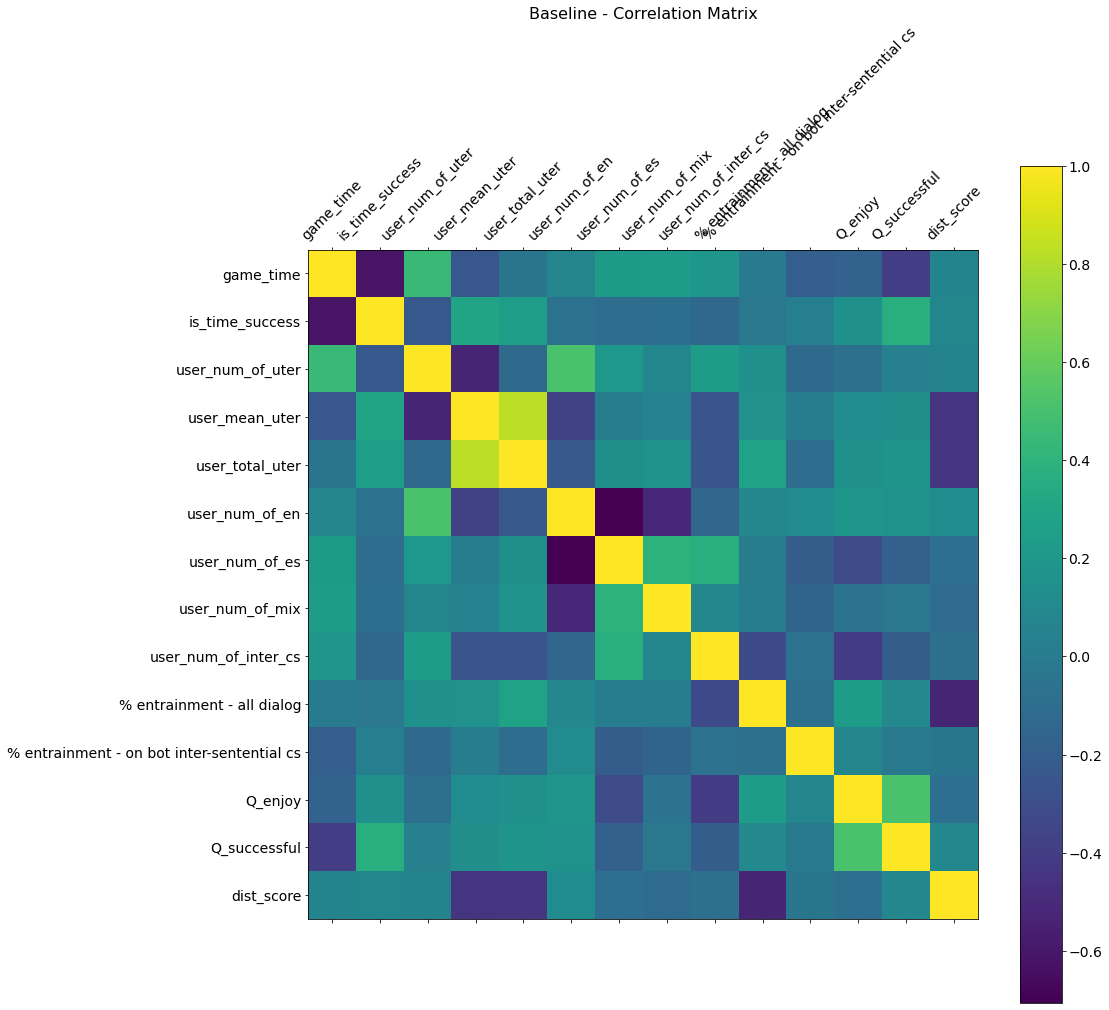

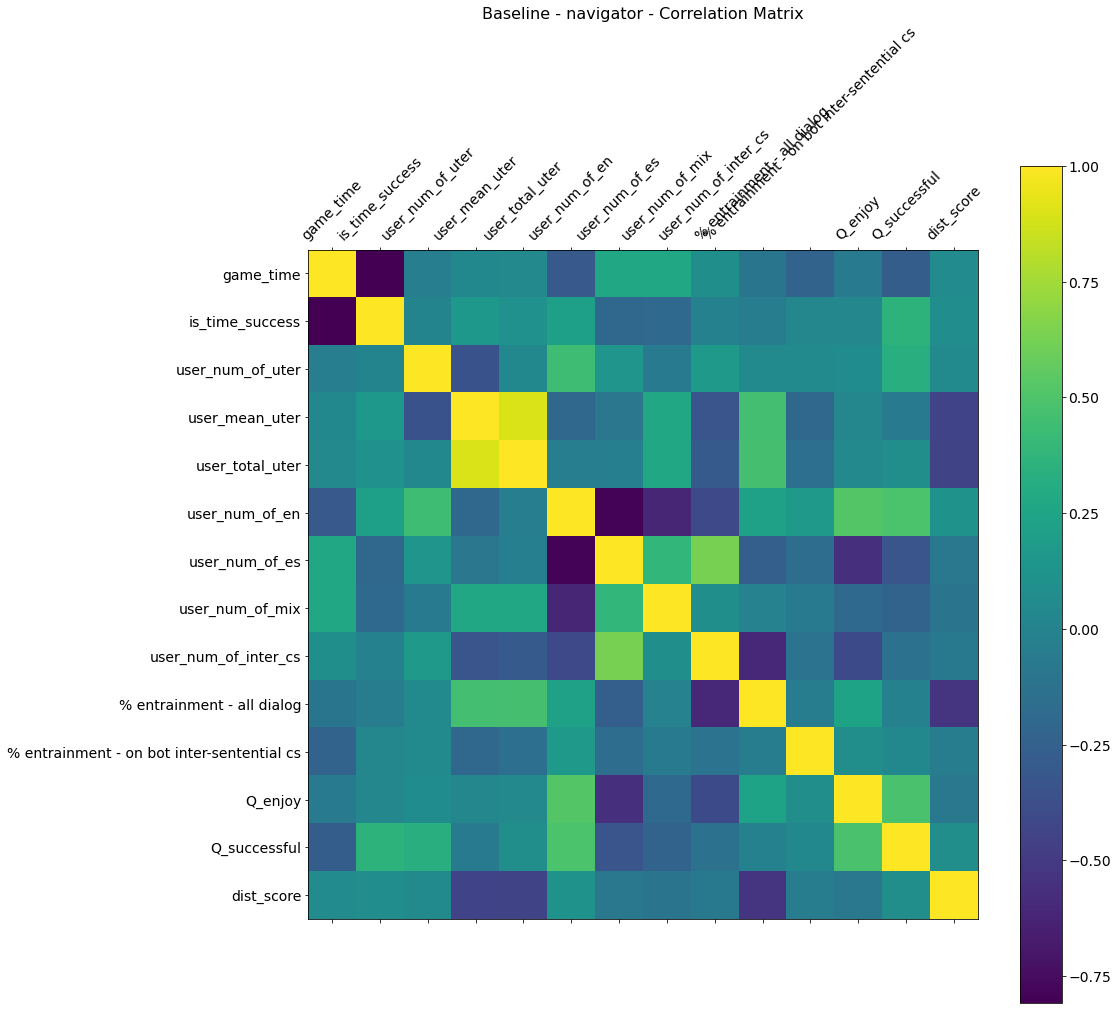

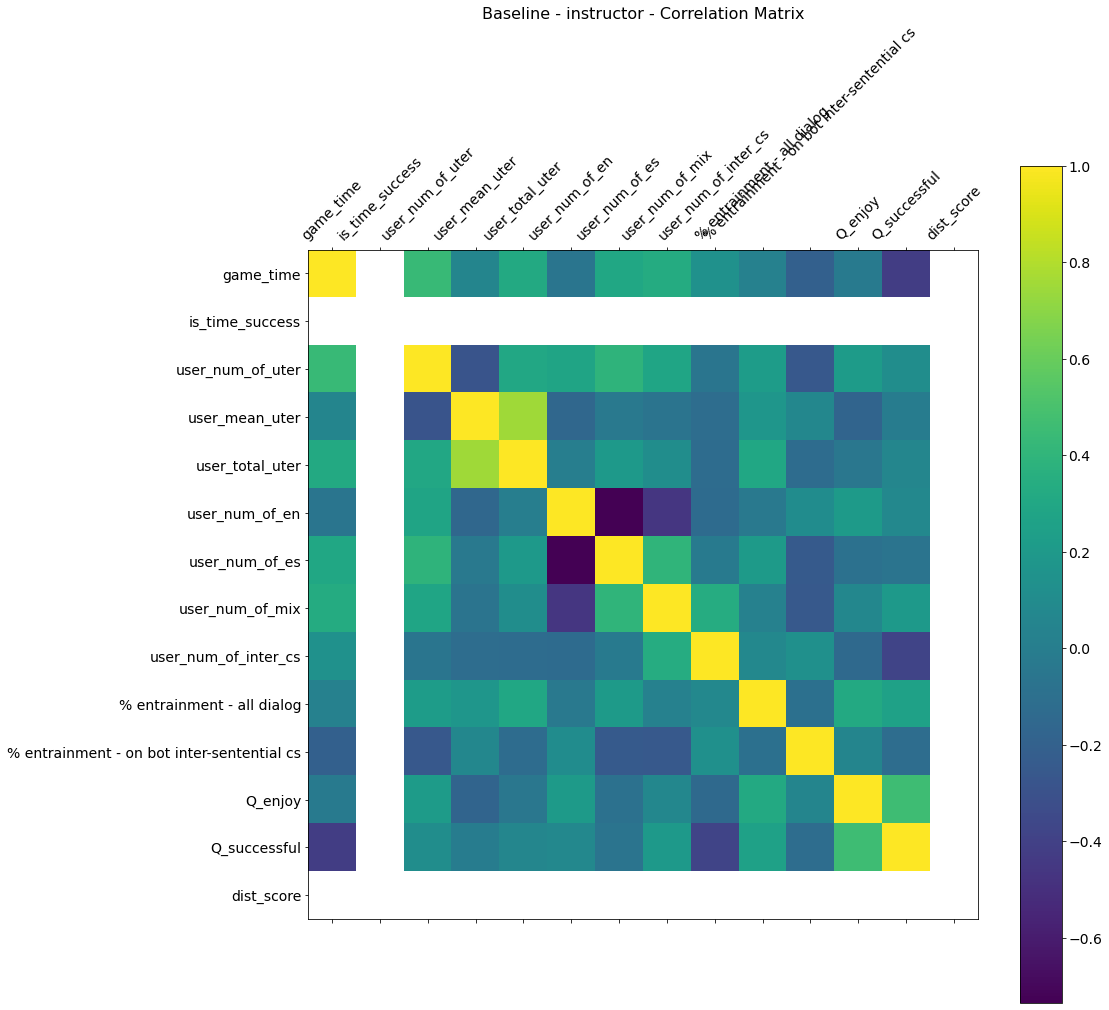

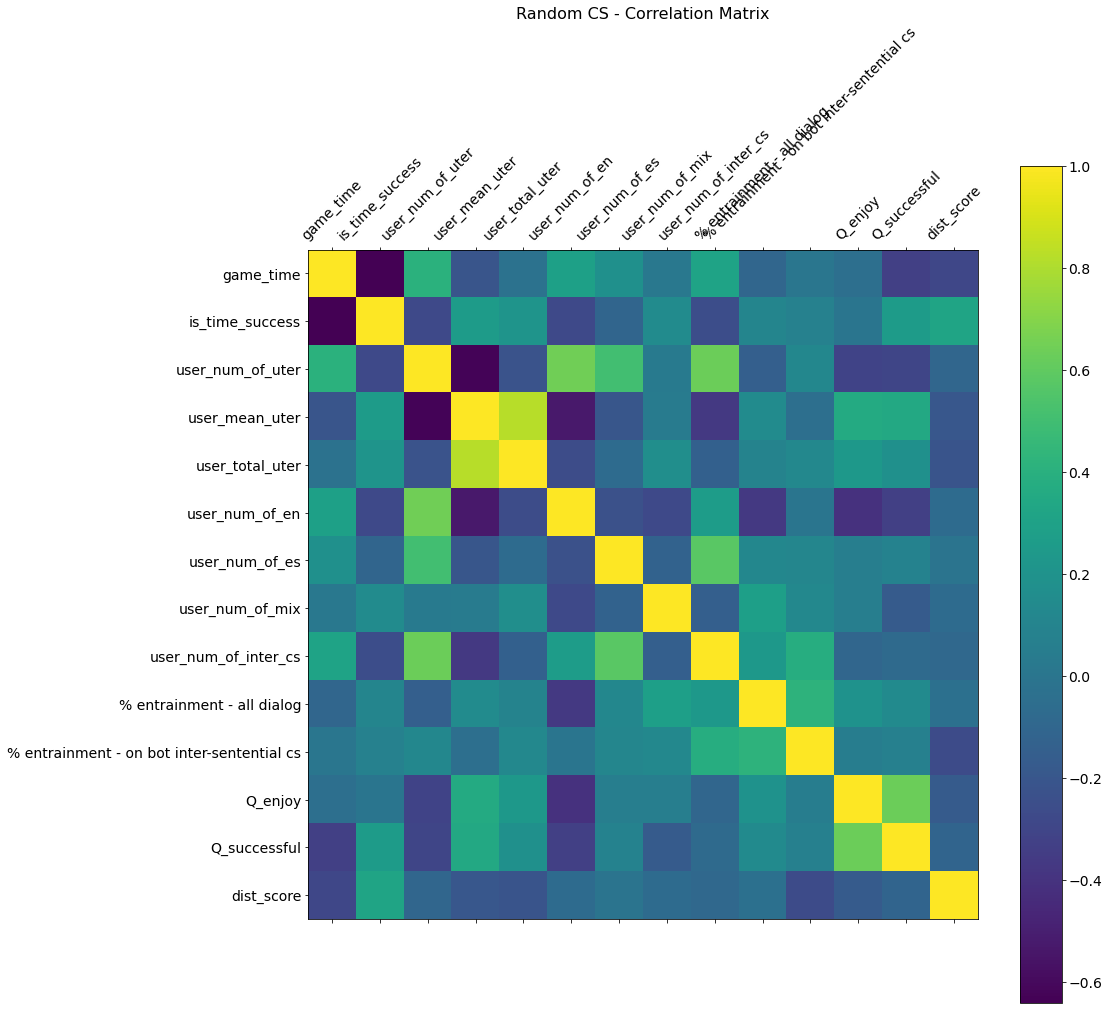

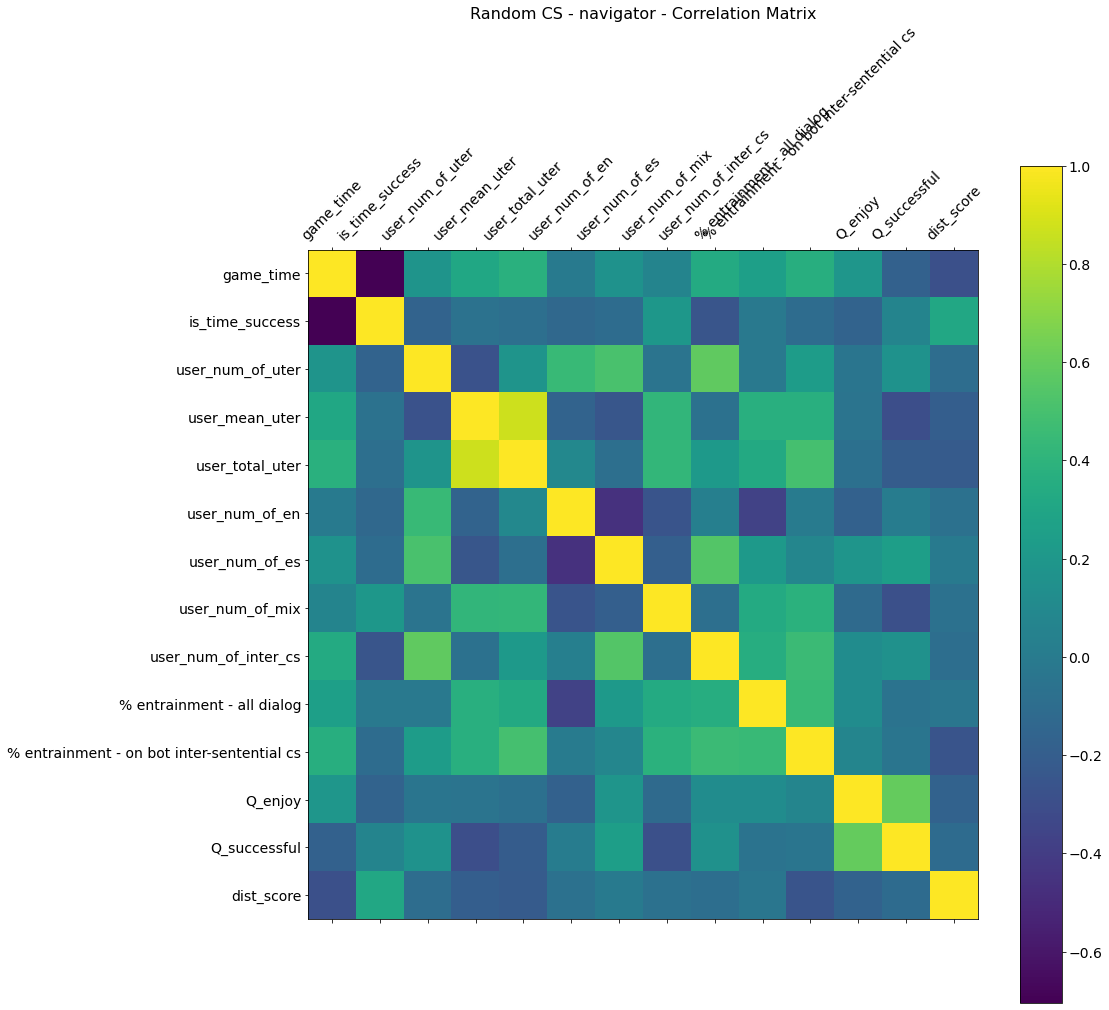

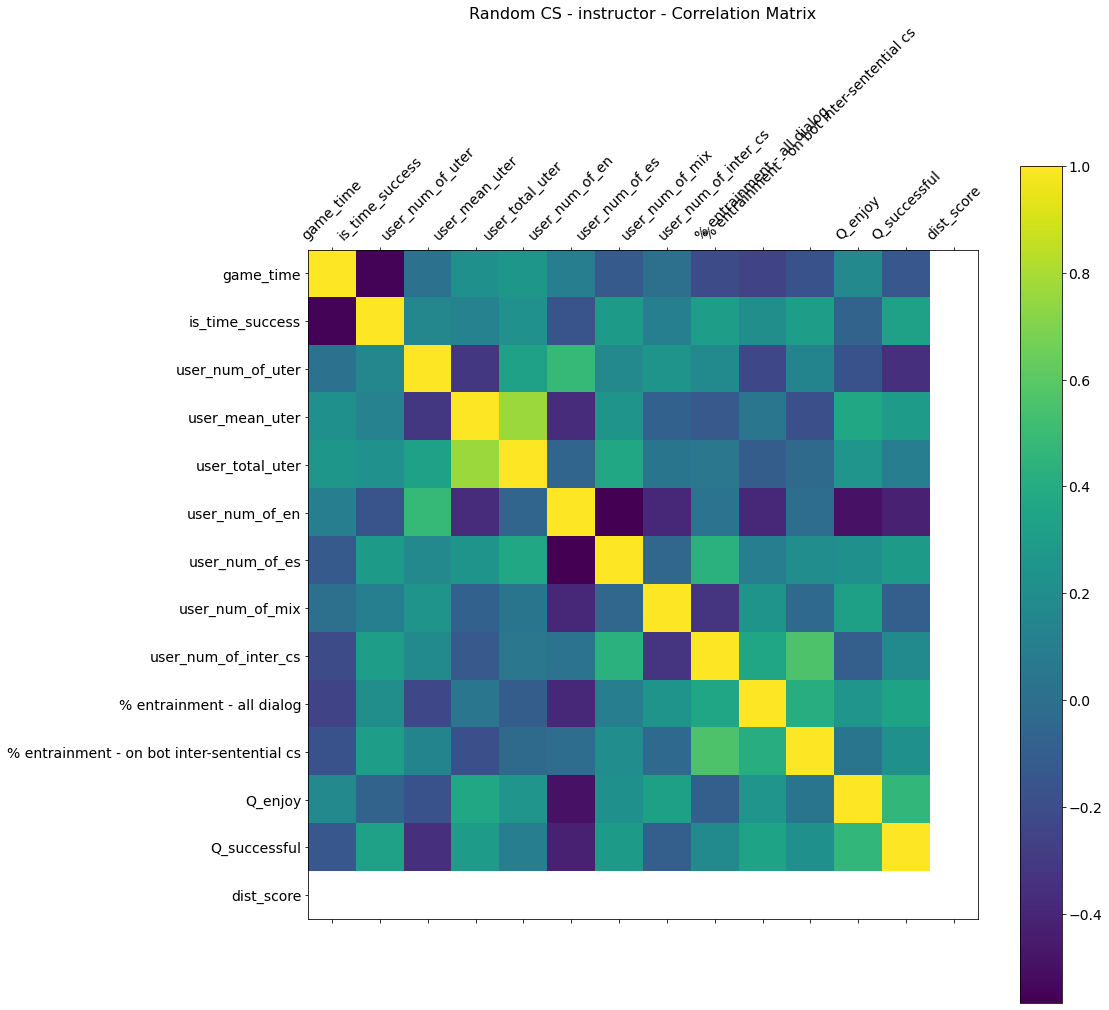

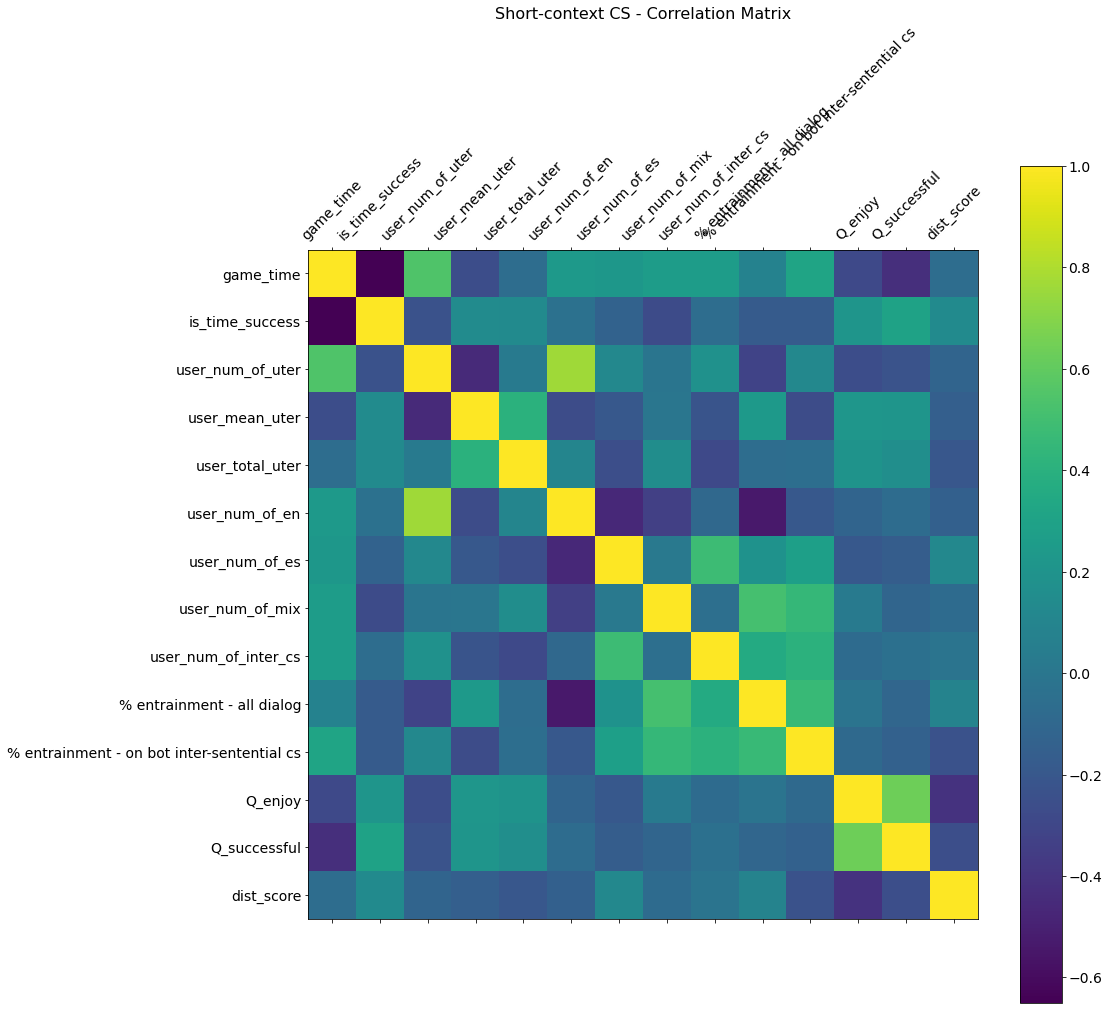

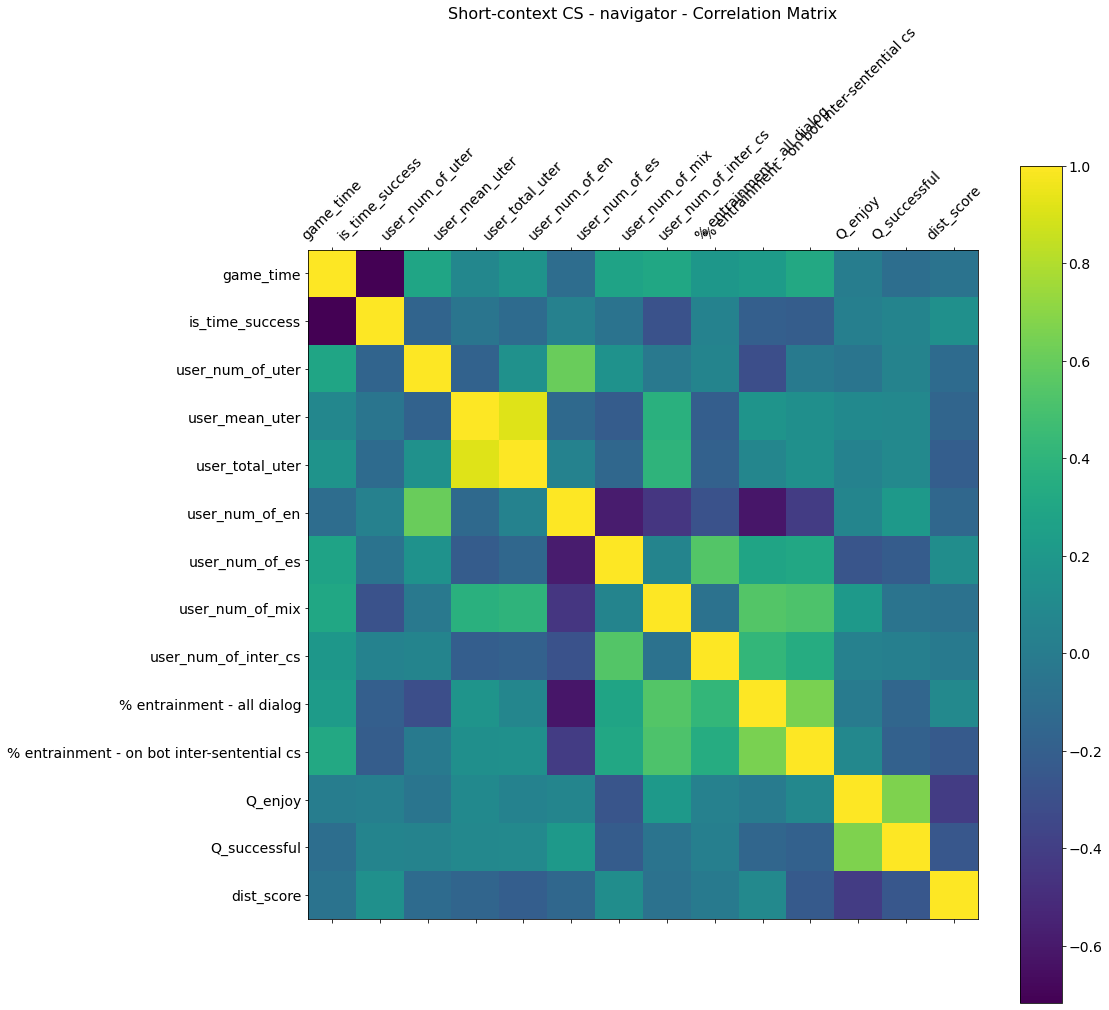

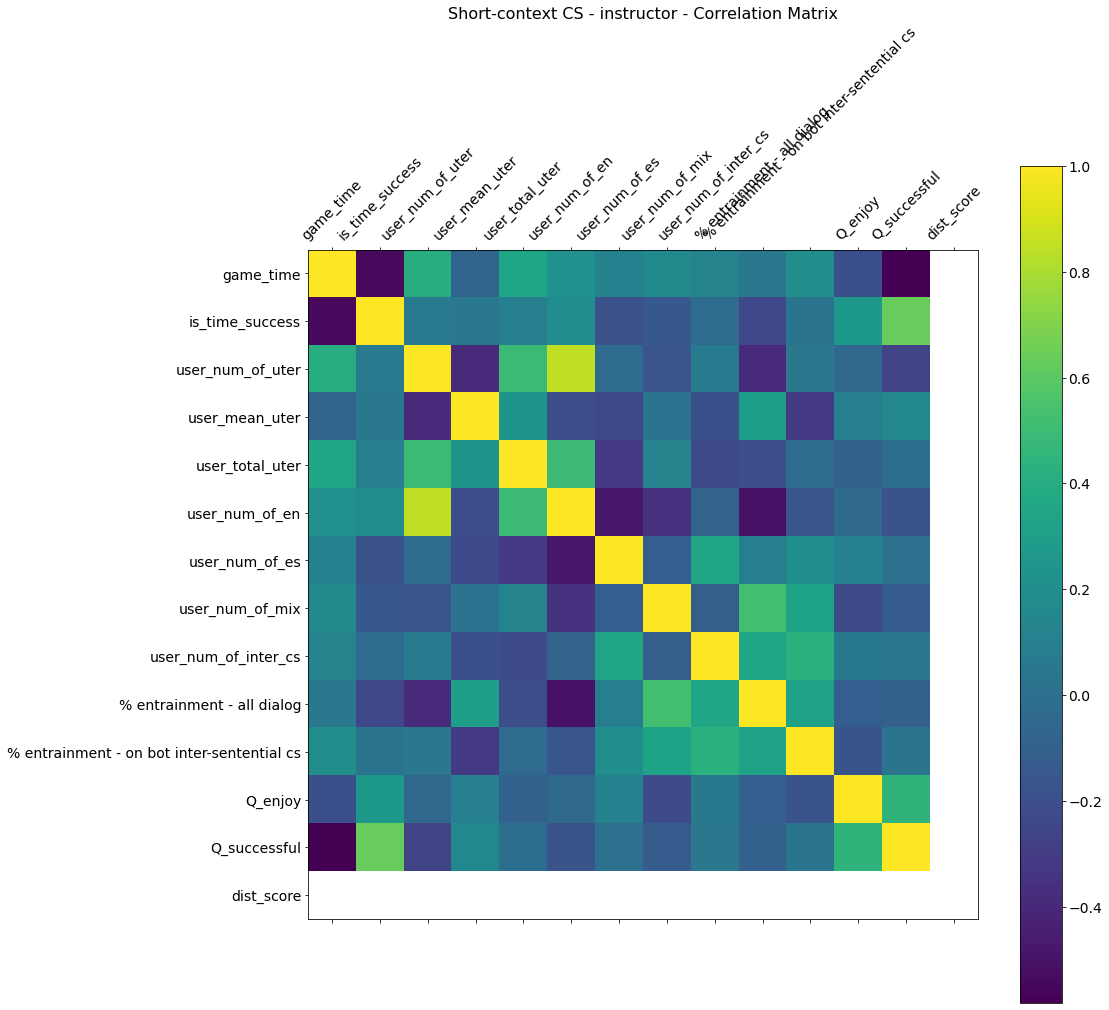

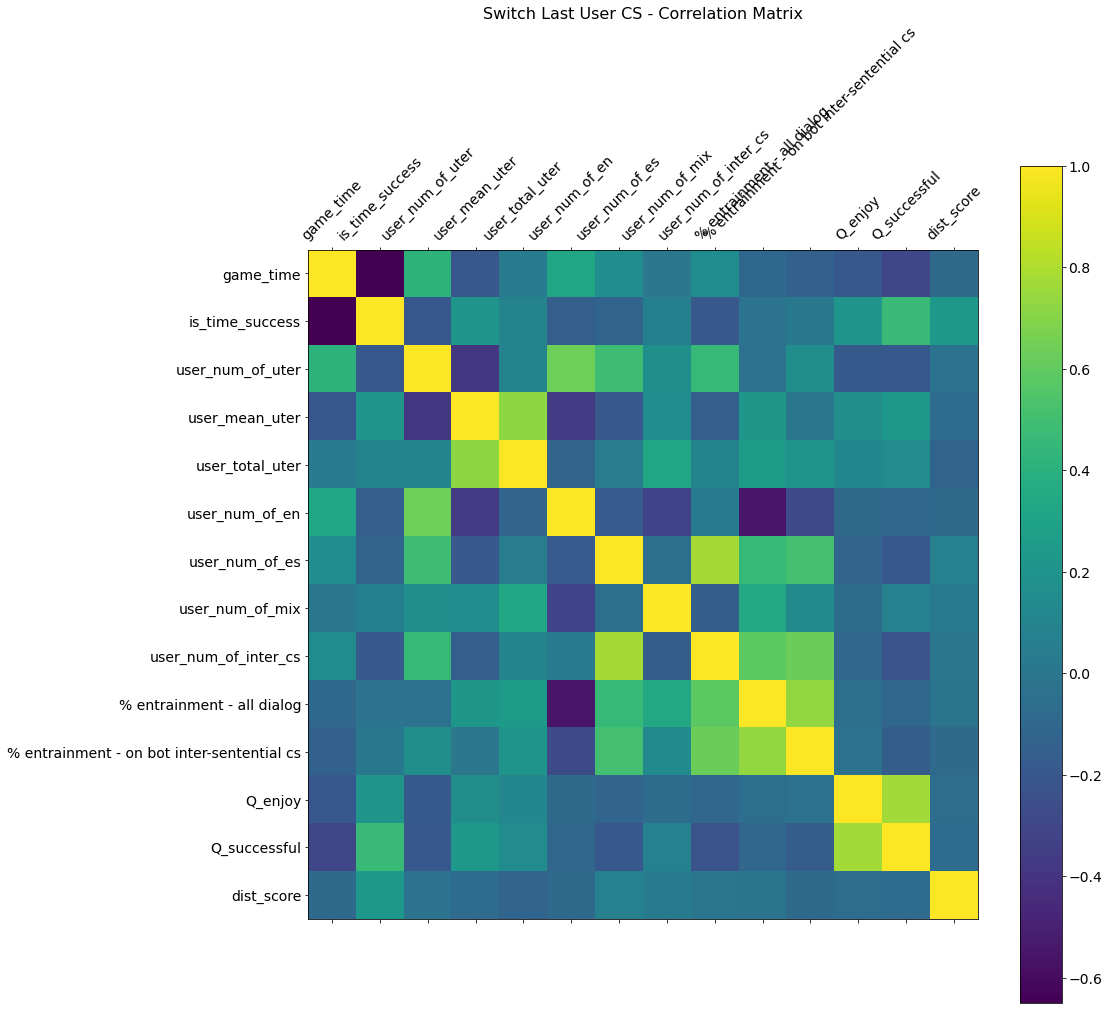

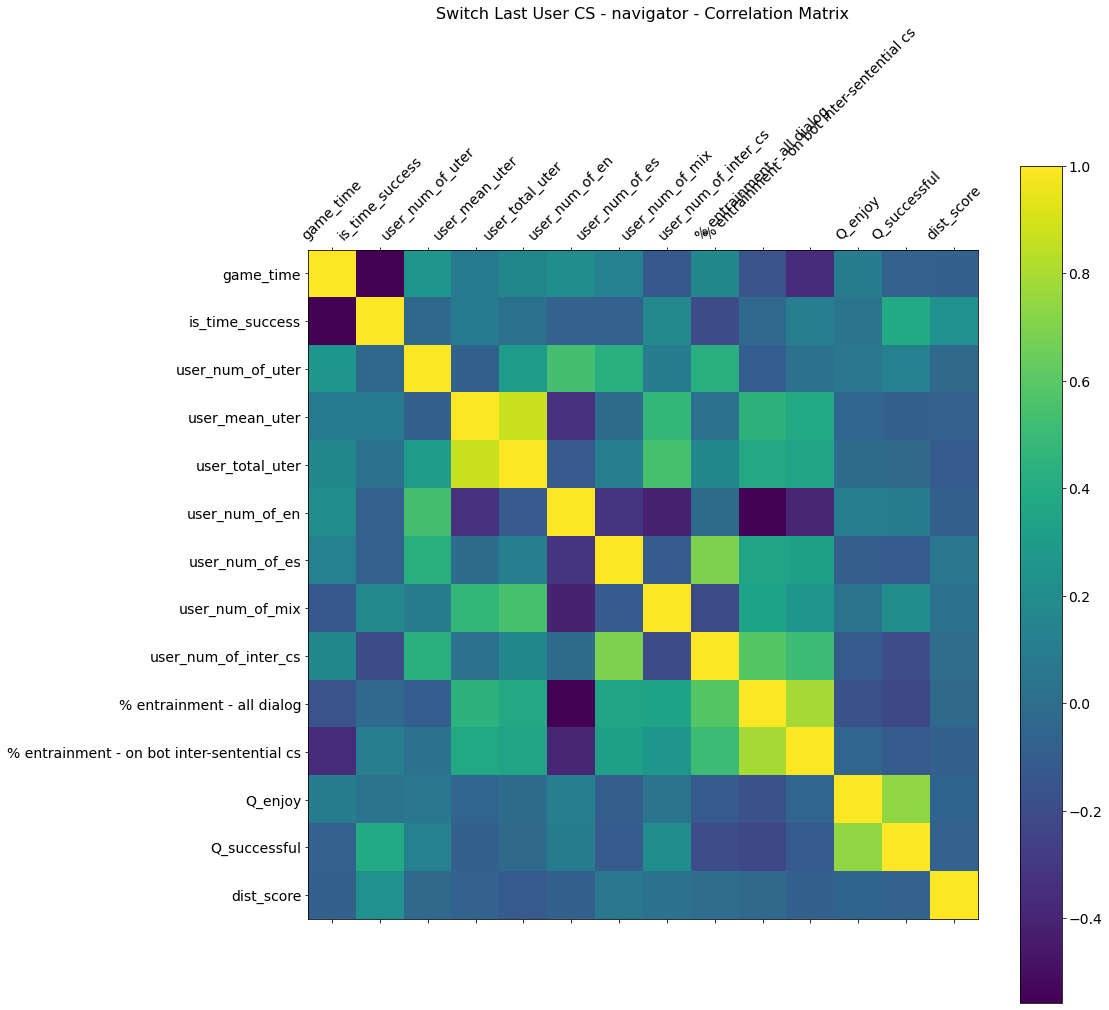

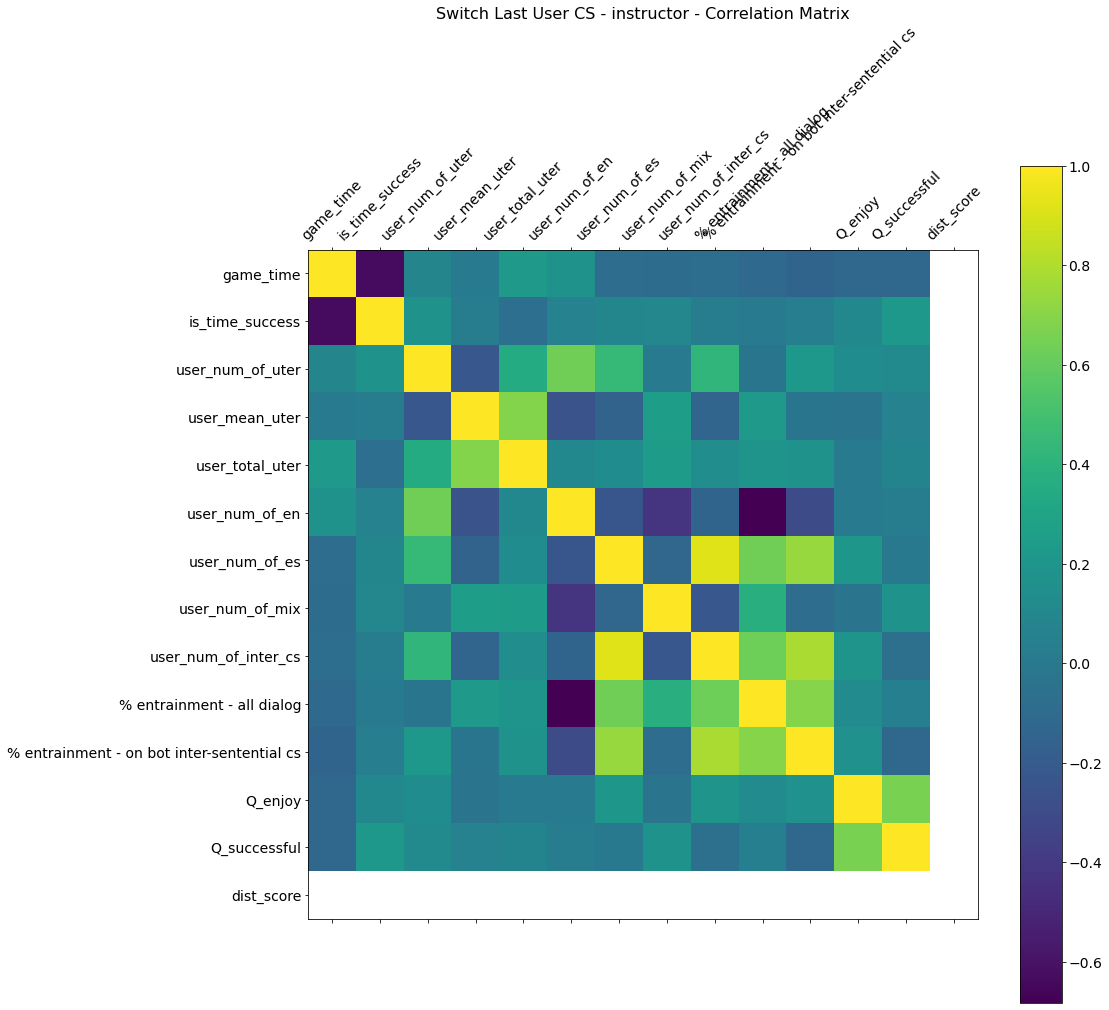

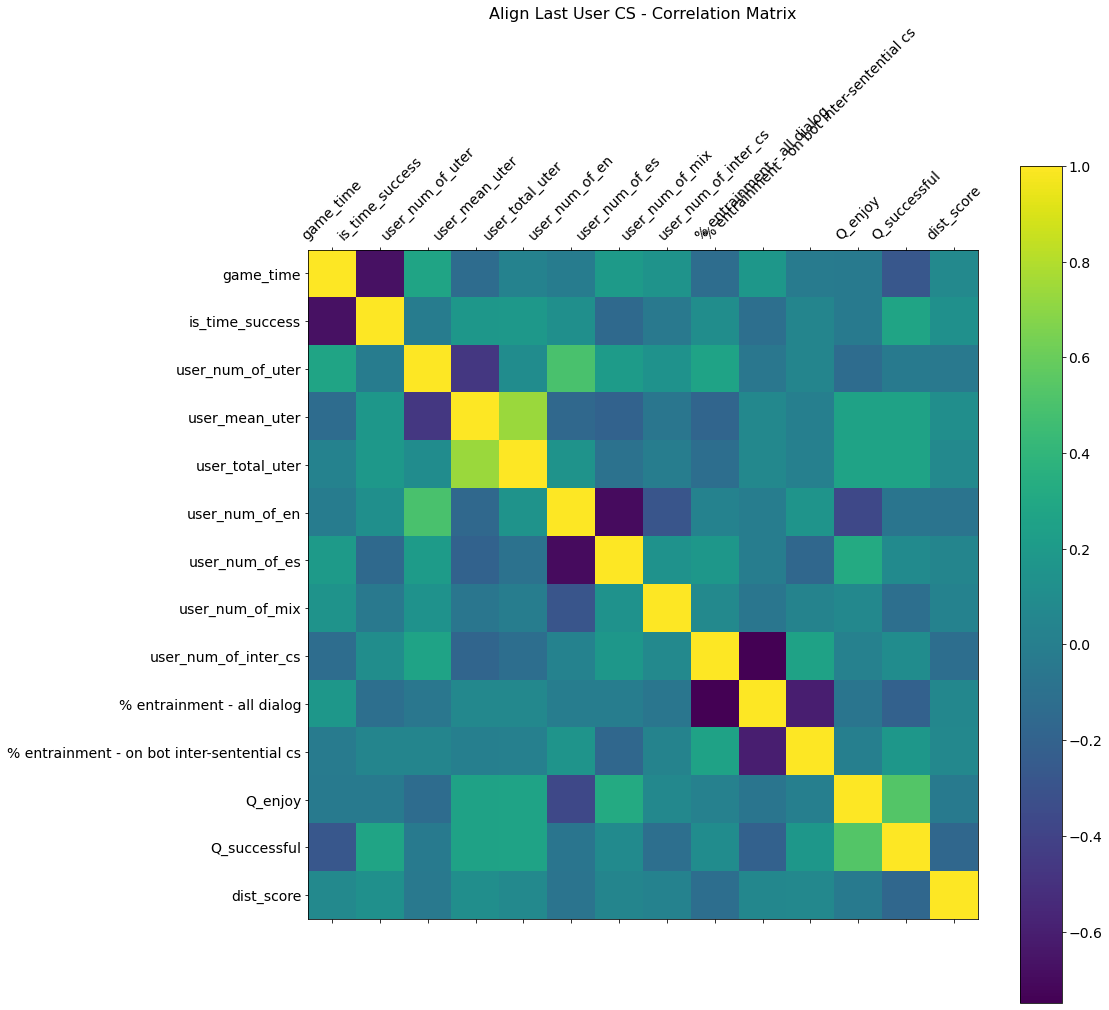

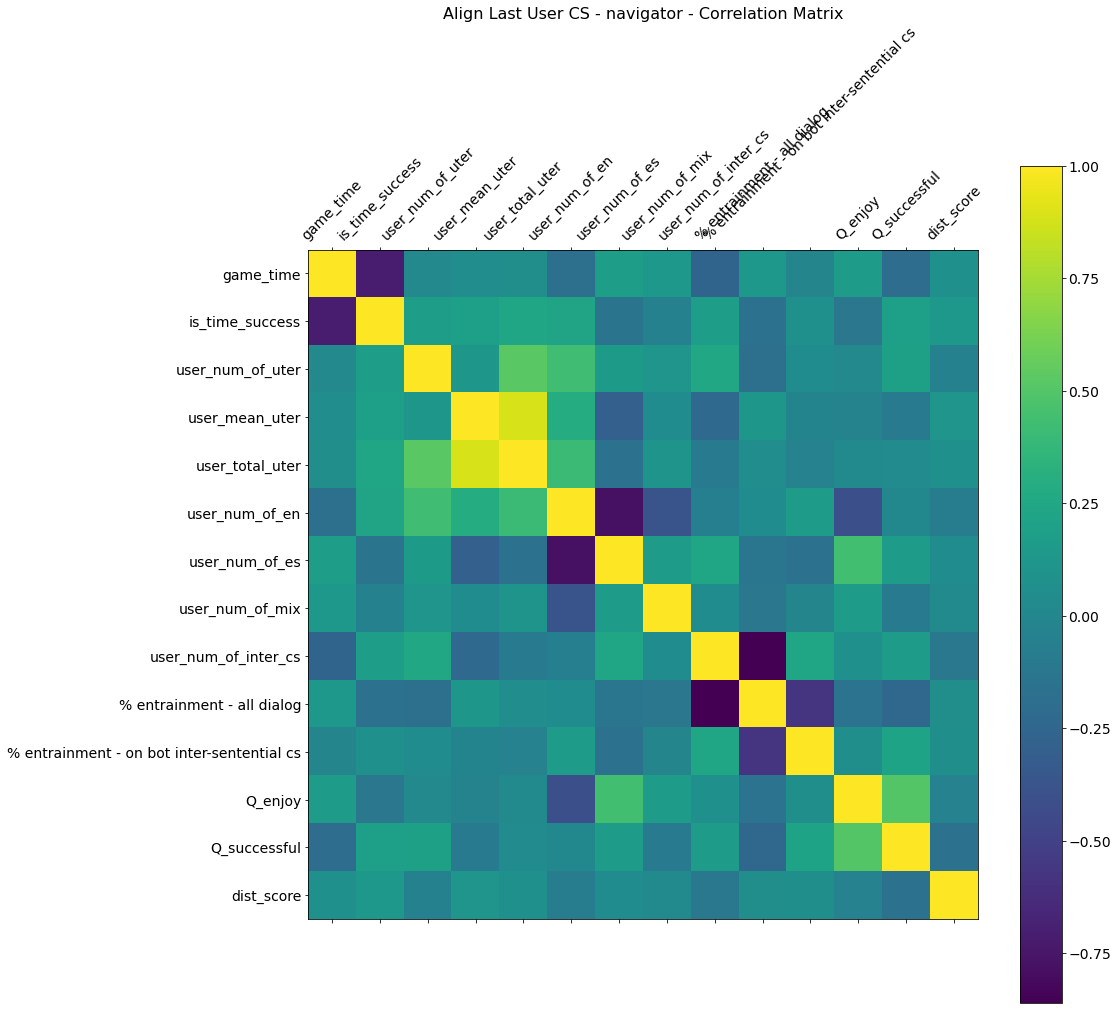

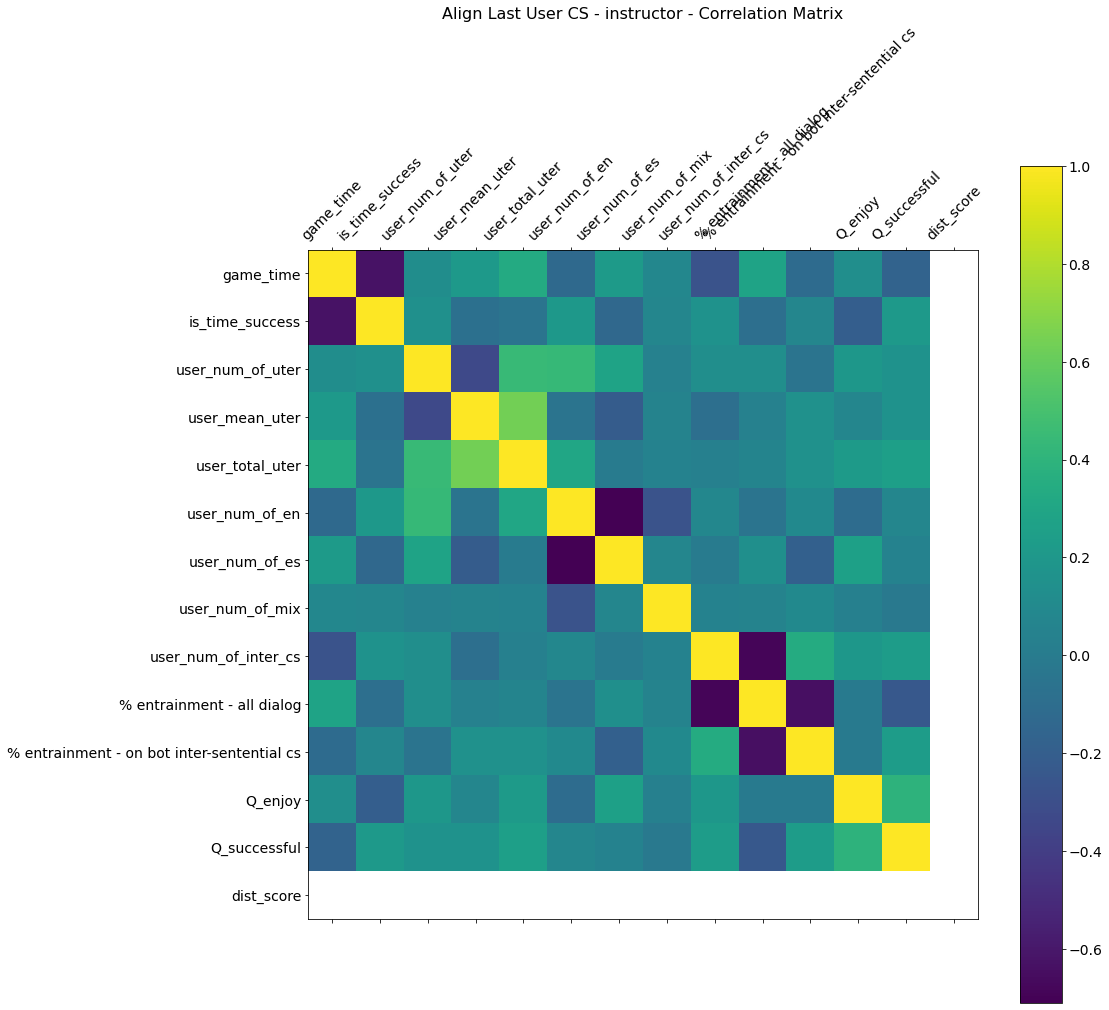

In [70]:
for exp in ['Baseline', 'Random CS', 'Short-context CS', 'Switch Last User CS', 'Align Last User CS']:
    exp_df = get_experiment_df(exp)
    exp_df = remove_un_imp_columns(exp_df)
    plot_corr_matt(exp_df, exp)
    
    
    for role in ['navigator', 'instructor']:
        exp_df = get_experiment_df(exp, role)
        exp_df = remove_un_imp_columns(exp_df)
        plot_corr_matt(exp_df, f'{exp} - {role}')
        
        if role == 'navigator':
            plot_2d(df=exp_df,
            x="% entrainment - all dialog",
            y="dist_score",
            color='is_time_success',
            size='game_time',
            title=f'{exp} - {role}')
        
        
        plot_2d(df=exp_df,
        x="% entrainment - all dialog",
        y="Q_enjoy",
        color='is_time_success',
        size='game_time',
        title=f'{exp} - {role}')

array([[<AxesSubplot:title={'center':'game_time'}>,
        <AxesSubplot:title={'center':'is_time_success'}>,
        <AxesSubplot:title={'center':'user_num_of_uter'}>,
        <AxesSubplot:title={'center':'user_mean_uter'}>],
       [<AxesSubplot:title={'center':'user_total_uter'}>,
        <AxesSubplot:title={'center':'user_num_of_en'}>,
        <AxesSubplot:title={'center':'user_num_of_es'}>,
        <AxesSubplot:title={'center':'user_num_of_mix'}>],
       [<AxesSubplot:title={'center':'user_num_of_inter_cs'}>,
        <AxesSubplot:title={'center':'% entrainment - all dialog'}>,
        <AxesSubplot:title={'center':'% entrainment - on bot inter-sentential cs'}>,
        <AxesSubplot:title={'center':'Q_enjoy'}>],
       [<AxesSubplot:title={'center':'Q_successful'}>,
        <AxesSubplot:title={'center':'dist_score'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

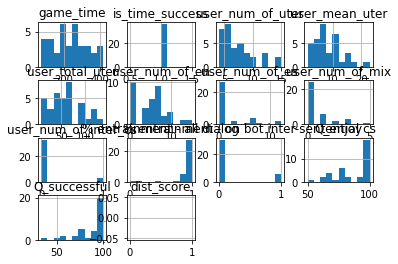

In [61]:
exp_df.hist()

In [67]:
exp_df = get_experiment_df('Baseline', 'instructor')
exp_df = remove_un_imp_columns(exp_df)
exp_df

,game_time,is_time_success,user_num_of_uter,user_mean_uter,user_total_uter,user_num_of_en,user_num_of_es,user_num_of_mix,user_num_of_inter_cs,% entrainment - all dialog,% entrainment - on bot inter-sentential cs,Q_enjoy,Q_successful,dist_score
55,131,1,8,11.875000,95,8,0,0,0,0.875000,1.0,91,100,NaN
57,126,1,8,12.125000,97,8,0,0,0,1.000000,0.0,95,96,NaN
63,286,1,9,7.666667,69,1,3,5,1,0.888889,0.0,76,94,NaN
65,108,1,6,5.166667,31,6,0,0,0,0.833333,1.0,70,100,NaN
93,184,1,6,5.833333,35,4,1,1,1,1.000000,0.0,62,72,NaN
95,253,1,5,10.200000,51,0,5,0,0,1.000000,0.0,62,72,NaN
133,263,1,14,4.928571,69,0,12,2,0,1.000000,0.0,81,93,NaN
135,345,1,10,9.900000,99,10,0,0,0,1.000000,0.0,66,87,NaN
167,231,1,12,5.833333,70,0,11,1,0,1.000000,0.0,100,100,NaN
169,220,1,10,11.500000,115,10,0,0,0,1.000000,0.0,100,100,NaN


In [69]:
    plot_2d(df=exp_df,
        x="% entrainment - all dialog",
        y="Q_enjoy",
        color='is_time_success',
        size='game_time',
        title=f'{exp} - {role}')